<p style="font-family: Arial; font-size:1.4em;color:gold;">PROJECT TITLE: Simple Image Classification with Logistic Regression using Scikit-learn</p>

In [1]:
# Import the required libraries
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings

# Suppress warnings for a cleaner output
warnings.filterwarnings("ignore")

<p style="font-family: Arial; font-size:1.4em;color:gold;">STEP 1. Loading the Digits Dataset</p>

In [2]:
# Load the digits dataset
d = load_digits()

# Display dataset description
print(d.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

<p style="font-family: Arial; font-size:1.4em;color:gold;">STEP 2. Exploring the Dataset</p>

In [3]:
# Shape of the data (number of samples, number of features)
d.data.shape

(1797, 64)

In [4]:
# The pixel values for the first sample
d.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
# Feature names (if available)
d.feature_names  

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [6]:
# Check if the dataset has an associated frame (this will be None for the digits dataset)
d.frame

In [7]:
# Shape of the images in the dataset (number of samples, height, width)
d.images.shape

(1797, 8, 8)

In [8]:
# Display the pixel values for the first image
d.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<p style="font-family: Arial; font-size:1.4em;color:gold;">STEP 3. Visualizing Some Digits

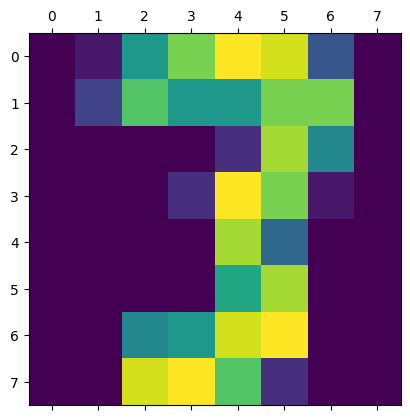

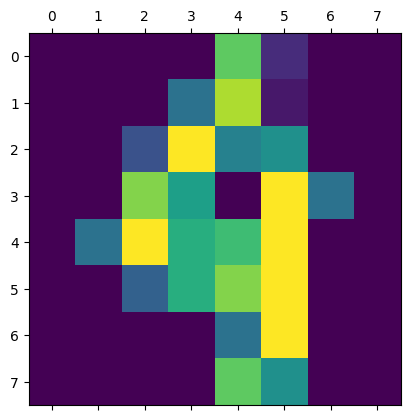

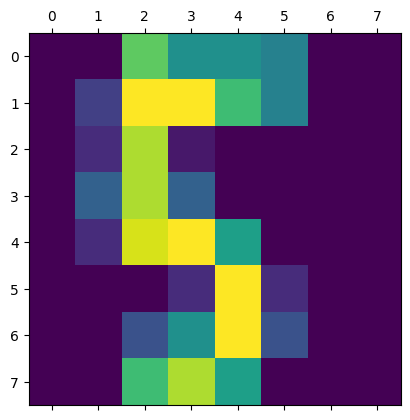

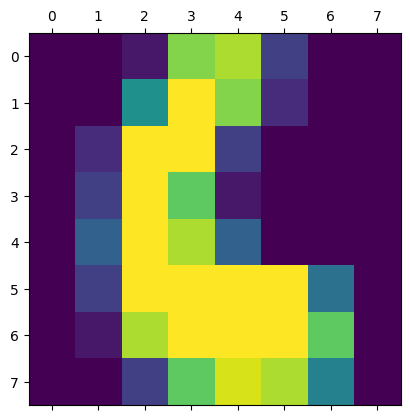

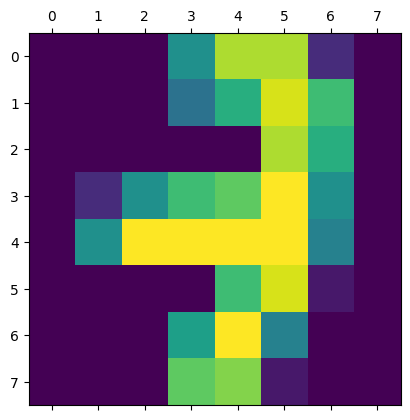

In [9]:
# Plot some of the images from the dataset
for i in range(23, 28):
    plt.matshow(d.images[i])

In [10]:
# Display the corresponding target labels for these images
d.target[23:28]

array([3, 4, 5, 6, 7])

In [11]:
# Display all the possible target labels (digits 0-9)
d.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<p style="font-family: Arial; font-size:1.4em;color:gold;">STEP 4. Preparing Data for Model Training</p>

In [12]:
# Set the input (features) and target (labels) for classification
x = d.data  # Flattened pixel data
y = d.target  # Target labels (0-9)

# Split the data into training and test sets (80% training, 20% testing)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

# Display the number of samples in the training and test sets
len(train_x), len(test_x)

(1437, 360)

<p style="font-family: Arial; font-size:1.4em;color:gold;">STEP 5. Training the Logistic Regression Model</p>

In [13]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(train_x, train_y)

LogisticRegression()

<p style="font-family: Arial; font-size:1.4em;color:gold;">STEP 6. Evaluating the Model</p>

In [14]:
# Evaluate the model's accuracy on the test set
model.score(test_x, test_y)

0.9805555555555555

<p style="font-family: Arial; font-size:1.4em;color:gold;">STEP 7. Making Predictions</p>

In [15]:
# Make a prediction for a single test sample (index 190)
model.predict(test_x[190:191])

array([6])

In [16]:
# Check the actual label for this sample
test_y[190]

6

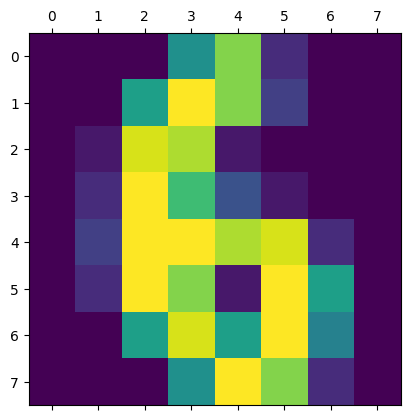

In [17]:
# Visualize the corresponding image
plt.matshow(test_x[190:191].reshape(8, 8))

<p style="font-family: Arial; font-size:1.4em;color:gold;">STEP 8. Model Deployment Using Pickle</p>

In [18]:
import pickle
# Save the model using pickle
pickle.dump(model, open("digit_classifier.pkl", "wb"))

<p style="font-family: Arial; font-size:1.4em;color:gold;">CODE TO CAPTURE SS OF INPUT AND OUTPUT</p>

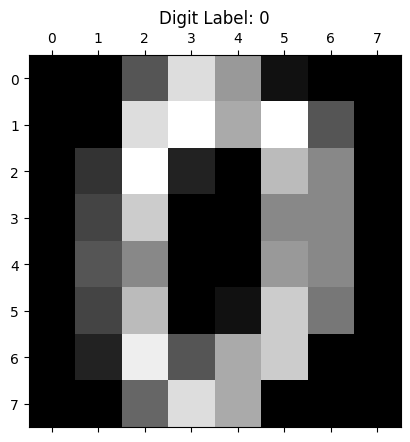

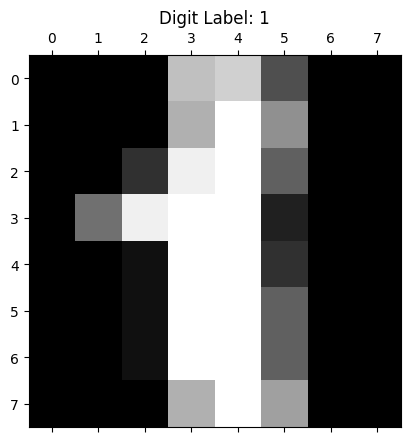

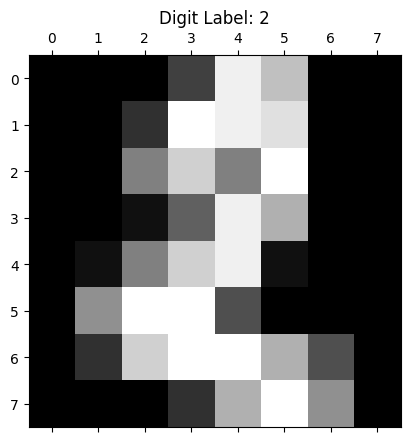

In [19]:
# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()

# Display first 3 digit images and their labels
for i in range(3):  # Change range for more or fewer samples
    plt.matshow(digits.images[i], cmap='gray')  # Show the image in grayscale
    plt.title(f"Digit Label: {digits.target[i]}")  # Display the corresponding label
    plt.show()


In [20]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits

# Load the dataset and split into train and test sets
digits = load_digits()
X = digits.data
y = digits.target
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(train_x, train_y)

# Print training accuracy
train_accuracy = model.score(train_x, train_y)
print(f"Training Accuracy: {train_accuracy:.2f}")


Training Accuracy: 1.00


Predicted: 9, Actual: 9


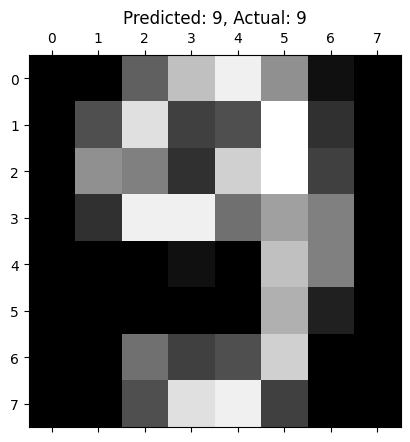

In [21]:
# Import required libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits

# Load the dataset and split into train and test sets
digits = load_digits()
X = digits.data
y = digits.target
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(train_x, train_y)

# Predict the digit for sample index 190 from the test set
sample_index = 190
predicted_label = model.predict([test_x[sample_index]])
actual_label = test_y[sample_index]

# Print predicted and actual labels
print(f"Predicted: {predicted_label[0]}, Actual: {actual_label}")

# Visualize the test sample image
plt.matshow(test_x[sample_index].reshape(8, 8), cmap='gray')
plt.title(f"Predicted: {predicted_label[0]}, Actual: {actual_label}")
plt.show()


In [22]:
# Load the dataset and split into train and test sets
digits = load_digits()
X = digits.data
y = digits.target
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(train_x, train_y)

# Evaluate the model's accuracy on the test set
test_accuracy = model.score(test_x, test_y)
print(f"Test Set Accuracy: {test_accuracy:.2f}")


Test Set Accuracy: 0.97
